<a href="https://colab.research.google.com/github/V4lciJr/Algoritmo-K-NN/blob/main/Alogoritmo_K_NN_exemplo_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo K-NN

KNN(K — Nearest Neighbors) é um dos muitos algoritmos ( de aprendizagem supervisionada ) usado no campo de data mining e machine learning, ele é um classificador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. O treinamento é formado por vetores de n dimensões.

## Importando as Bibliotecas

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# importando o dataset iris
iris = load_iris()

## Transformando o Dataset em um Dataframe

In [5]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Gerando um Target(Alvo)

In [6]:
df_iris['target'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Gerando um Target Name (Apenas demonstração)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df_iris['target_name'] = iris.target_names[df_iris['target']]
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Determinando as features (colunas, atributos) que vão fazer parte do estudo



In [9]:
iris_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Determinando o nosso alvo (y), para fazer uma classificação usando o K-NN precisamos de um alvo numérico

In [17]:
y = df_iris.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## Selecionando os dados, as features que serão utilizadas (X)

In [18]:
X = df_iris[iris_features]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Usando o Scikit-learn

Define = Escolha o modelo (define parâmetros)

Fit = Treinar

Predict = Fazer a predição

Evaluate = Avaliar os resultados

## Importando o algoritmo K-NN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Fazendo o train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

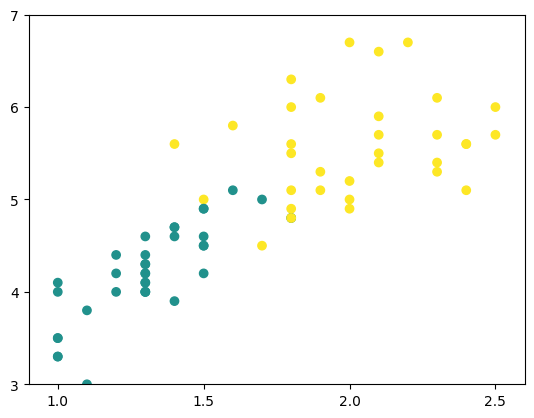

In [25]:
## visualzando os dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x = x_train['petal width (cm)'],
           y = x_train['petal length (cm)'],
           c = y_train,
           cmap = 'viridis')

ax.set(xlim=(0.9, 2.6), xticks=[1, 1.5, 2, 2.5],
       ylim=(3, 7), yticks=[3, 4, 5, 6, 7])

plt.show()

## Selecionando o modelo

In [13]:
modelo = KNeighborsClassifier(3)

## Treinando o modelo

In [14]:
modelo.fit(X, y)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Ver a predição

In [15]:
print(modelo.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Observando a acurácia (porcentagem de acertos), aqui estamos colocando para validação, os mesmos dados que foram treinados

In [16]:
modelo.score(X, y)

0.96

- Algoritmo k-NN é utilizado em problemas de classificação;
-  Classificação medindo a distância do ponto em relação aos
vizinhos mais próximos;
- Passos:
  - Manipulação dos dados;
  - calcular a distância;
  - encontrar o ponto mais próximo;
  - prever a classe;
  - verificação da precisão

## Referências:

- [https://www.dio.me/articles/o-conjunto-de-dados-iris-e-um-dos-conjuntos-de-dados-mais-populares-em-ciencia-de-dados-e-aprendizado-de-maquina]

- [https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e]

- [https://www.hashtagtreinamentos.com/]

- Introdução a Ciência dos Dados (UFMS)
